# Time Series Exploratory Analysis Exercises

09 February 2023

In [1]:
# imports
import pandas as pd
import numpy as np

from wrangle import acquire_store
import prepare_time_series as p

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [35]:
shop = acquire_store()

In [38]:
# preparing shop

shop = p.grocery_sales_datetime(shop)

In [39]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  int64  
 1   item_brand     913000 non-null  object 
 2   item_name      913000 non-null  object 
 3   item_price     913000 non-null  float64
 4   store_address  913000 non-null  object 
 5   store_zipcode  913000 non-null  int64  
 6   month          913000 non-null  int64  
 7   day            913000 non-null  int64  
 8   sales_total    913000 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 69.7+ MB


In [40]:
# oldest & newest dates

shop.index.min(), shop.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

### splitting data

In [41]:
# splitting data

train_long = int(0.5 * len(shop))

val_test_fen = int(0.7 * len(shop))

train_long, val_test_fen

(456500, 639100)

In [42]:
# splitting data into TVT

train = shop.iloc[:train_long]

val = shop.iloc[train_long:val_test_fen]

test = shop.iloc[val_test_fen:]

train.shape, val.shape, test.shape

((456500, 9), (182600, 9), (273900, 9))

In [9]:
# human-based splitting

tr = shop[:2014]
va = shop[2014:2017]
te = shop[2017:]

tr.shape, va.shape, te.shape

((2014, 7), (3, 7), (910983, 7))

In [43]:
# looking at train

train.sample(3)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,
2013-09-05,16,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,9,5,13.44
2014-10-13,36,Hood,Hood Latte Iced Coffee Drink Vanilla Latte,2.43,1015 S WW White Rd,78220,10,13,87.48
2014-03-18,27,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,2118 Fredericksburg Rdj,78201,3,18,151.74


### visualise train

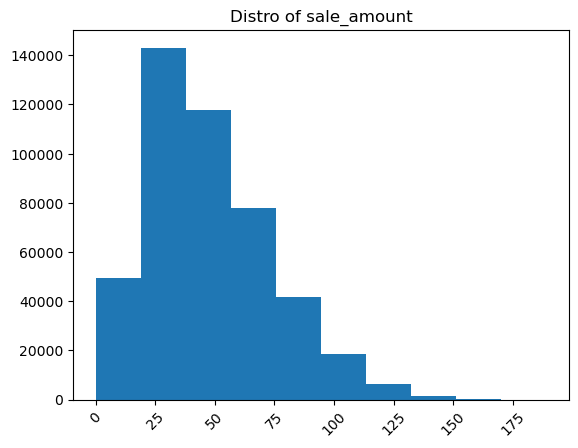

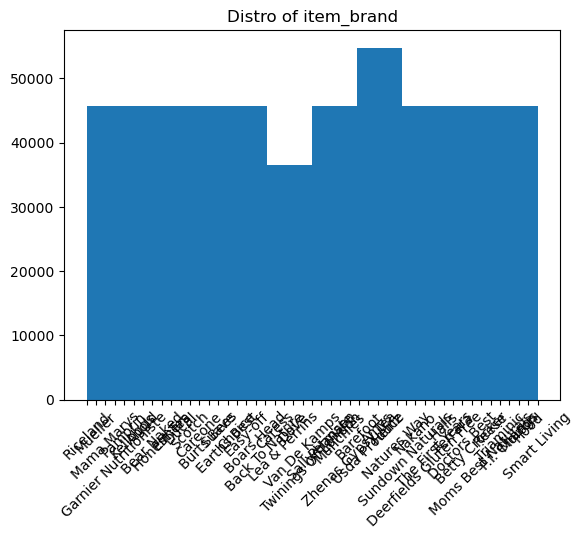

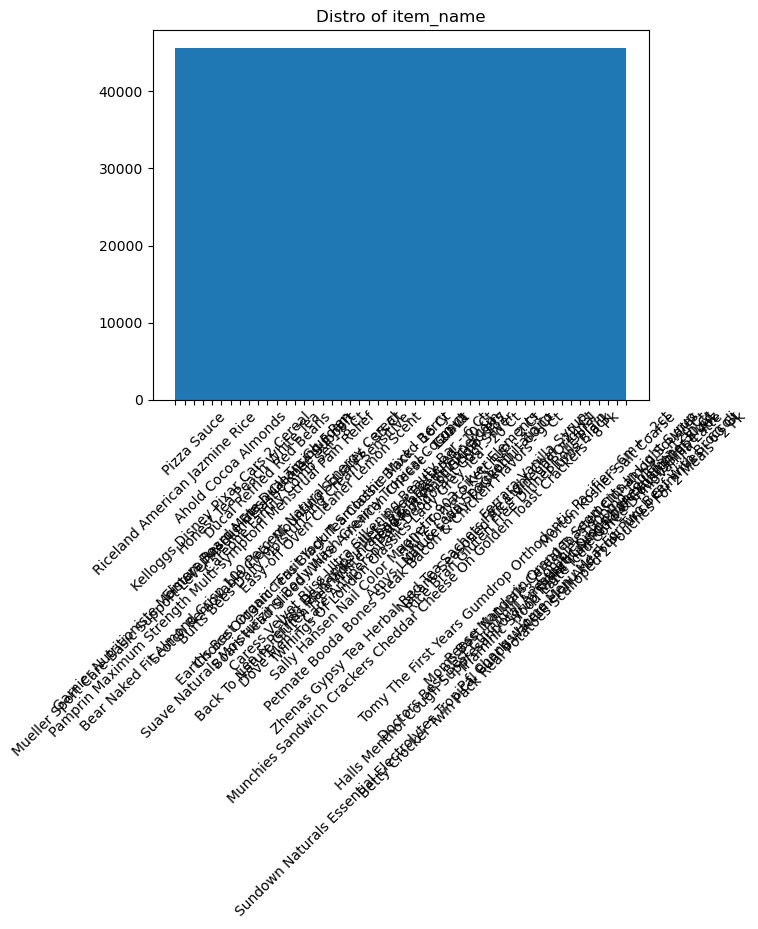

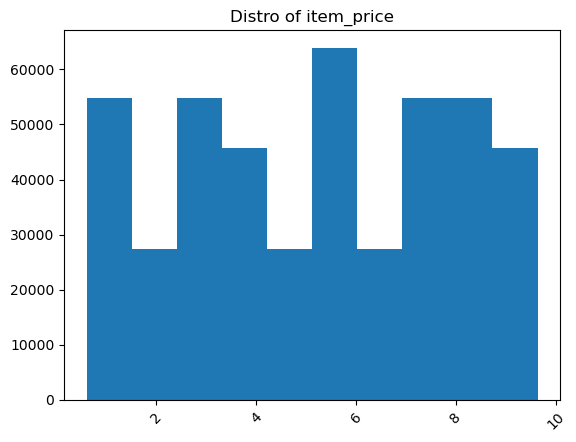

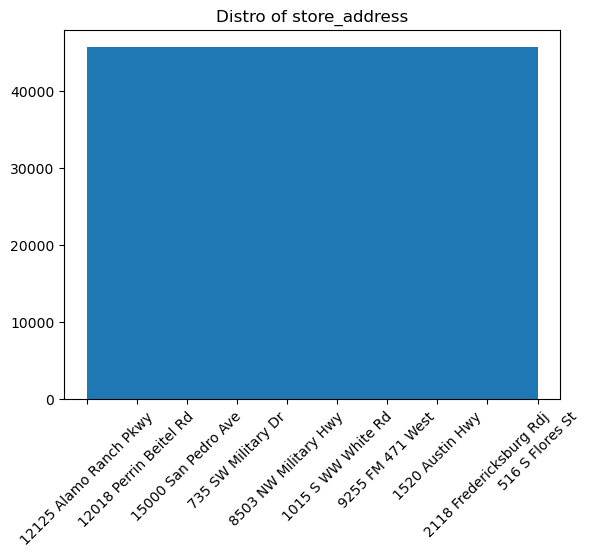

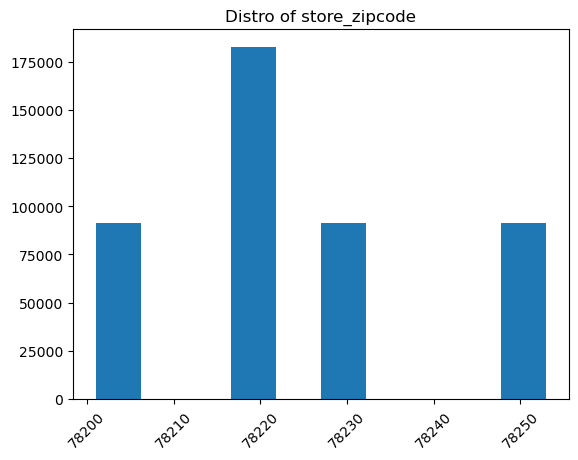

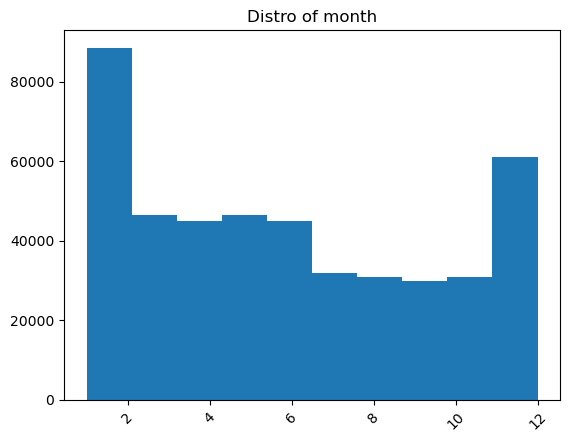

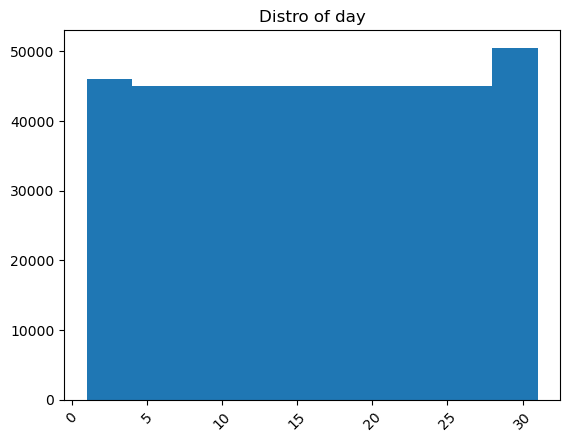

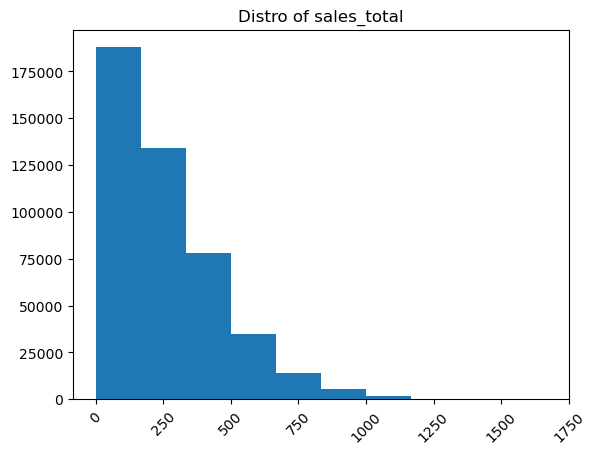

In [44]:
# plotting all cols

for col in train:
    
    plt.hist(train[col])
    plt.title(f'Distro of {col}')
    plt.xticks(rotation = 45)
    plt.show()

In [45]:
# months in DF train.index.month_name().unique()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='sale_date')

In [47]:
# group by avg monthly sales

train.groupby('month')['sales_total'].mean().sort_values(ascending = False)

month
7     320.575941
6     315.359146
5     297.581444
8     286.764421
4     274.131260
11    267.464846
9     264.294062
10    245.500918
3     237.470011
2     197.069605
12    188.146335
1     177.343573
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='month'>

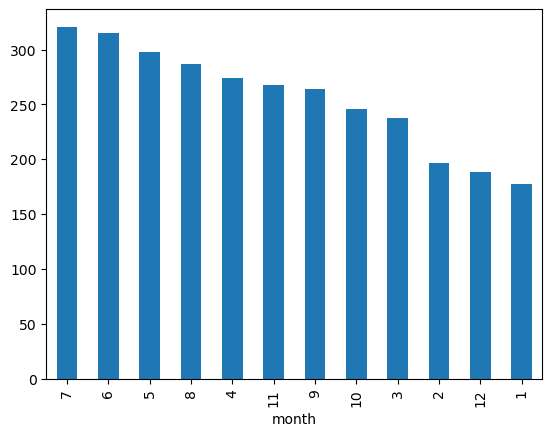

In [52]:
# plotting monthly sales totals

train.groupby('month')['sales_total'].mean().sort_values(ascending = False).plot.bar()

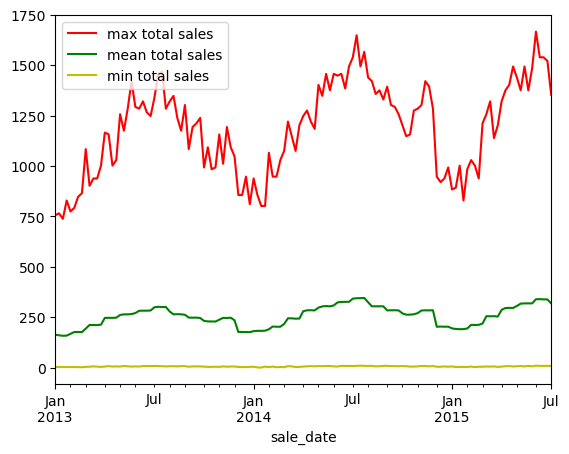

In [78]:
# plotting train


train['sales_total'].resample('w').max().plot(c = 'r')
train['sales_total'].resample('w').mean().plot(c = 'g')
train['sales_total'].resample('w').min().plot(c = 'y')

plt.legend(['max total sales', 'mean total sales', 'min total sales'])

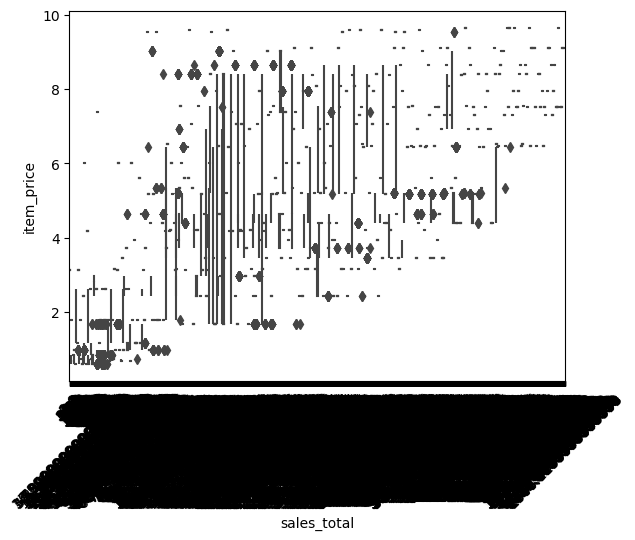

In [85]:
sns.boxplot(data = train, y = 'item_price', x = 'sales_total')
plt.xticks(rotation = 45)
plt.show()